# 1. Introduction- Analysis of European Soccer Data.

- Soccer is one of the most watched and played sport in europe or in the world. Here we are going to do analysis of the european soccer data. 
- This data includes various tables giving us inofrmation of matches played , teams involved , players involved and their scores in the matches. 
- In this analysis project we have used SQL querries primarily along with some pandas or python functions or commands.
- The database used here is a sqlite database and goes with the name 'database.sqlite'

# 2. Importing the important libraries for analysis.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt


# 3. Connecting with Database stored in sqlite database format.

In [10]:
path = "D:\\Data Sets\\database.sqlite"
database = path

In [11]:
conn = sqlite3.connect(database)

# 4. Getting database tables.

In [ ]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


# 5. Some basic analysis of the tables.

Here we are trying to get countries from Country table.

In [13]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


Here we are getting all the leagues from League table.

In [15]:
pd.read_sql("""SELECT * FROM League;""",conn)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


Here we are getting the joining the league and country table to get country origin of the leagues.

In [14]:
leagues = pd.read_sql("""SELECT *
                        FROM League JOIN Country ON Country.id=League.country_id;""",conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


Here we are getting all the entries from teams table.

In [17]:
teams=pd.read_sql("""SELECT *
                        FROM Team Order By team_long_name Limit 10 ;""",conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


# 6. Finding some intersting results.

- Here in this section we are going to perform some more joins and perform some aggregate functions to ddo  some advance analysis of the tables and get some important results.
- This database is basically in the form of star formation where Match table acts as main table with most of the data and rest of the table acts as supporting tables.

In [20]:
detailed_matches= pd.read_sql(""" SELECT Match.id , Country.name as country_name , League.name as league_name ,
                                  Match.stage, 
                                  Match.season,
                                  Match.date , 
                                  HT.team_long_name as home_team , 
                                  AT.team_long_name as away_team,
                                  Match.home_team_goal,
                                  Match.away_team_goal 
                                  FROM Match INNER JOIN Country ON Match.country_id = Country.id 
                                  INNER JOIN League ON  League.id=Match.league_id
                                  LEFT JOIN Team as HT ON HT.team_api_id = Match.home_team_api_id 
                                  LEFT JOIN Team as AT ON AT.team_api_id = Match.away_team_api_id
                                  WHERE country_name = 'Spain'
                                  Order BY date 
                                  LIMIT 10   """ , conn)

detailed_matches

,id,country_name,league_name,stage,season,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,1,2008/2009,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,1,2008/2009,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,1,2008/2009,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,1,2008/2009,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,1,2008/2009,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,1,2008/2009,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,1,2008/2009,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,1,2008/2009,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,1,2008/2009,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,1,2008/2009,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


We have got details of all the matches by performing joins of the  main table Matches with other tables like country, league, team to get some important columns details  .

In [22]:
leagues_season = pd.read_sql("""SELECT Country.name as country_name , League.name as league_name , 
                                  Match.season,
                                  Match.date , 
                                  COUNT(DISTINCT stage) as distinct_number_of_stages,
                                  COUNT(DISTINCT  HT.team_long_name) as number_of_teams,
                                  AVG(home_team_goal) as avg_home_team_goals,
                                  AVG(away_team_goal) as avg_away_team_goals,
                                  AVG(home_team_goal-away_team_goal) as avg_goal_differnce,
                                  AVG(home_team_goal+away_team_goal) as avg_total_goals,
                                  SUM(home_team_goal+away_team_goal) as total_goals
                                  FROM Match INNER JOIN Country ON Match.country_id = Country.id 
                                  INNER JOIN League ON  League.id=Match.league_id
                                  LEFT JOIN Team as HT ON HT.team_api_id = Match.home_team_api_id 
                                  LEFT JOIN Team as AT ON AT.team_api_id = Match.away_team_api_id
                                  WHERE country_name in  ('Spain','Italy','England','Germany','France')
                                  GROUP BY Country.name,League.name,Match.season
                                  HAVING count(distinct stage) > 10
                                  Order BY Country.name,League.name,Match.season  DESC """ , conn)

leagues_season

,country_name,league_name,season,date,distinct_number_of_stages,number_of_teams,avg_home_team_goals,avg_away_team_goals,avg_goal_differnce,avg_total_goals,total_goals
0,England,England Premier League,2015/2016,2015-08-09 00:00:00,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,2014-08-16 00:00:00,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,2013-08-17 00:00:00,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,2012-08-18 00:00:00,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,2011-08-13 00:00:00,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,2010-08-14 00:00:00,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,2009-08-16 00:00:00,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,2008-08-17 00:00:00,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,2015-08-08 00:00:00,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,2014-08-08 00:00:00,38,20,1.410526,1.081579,0.328947,2.492105,947


We have got more information of leagues through joins and performed some aggregate functions to get some more results about different leagues. 

# 7. Making dataframe of the above tables and plotting them.

In [24]:
df = pd.DataFrame(index=np.sort(leagues_season['season'].unique()), columns=leagues_season['country_name'].unique())
df

,England,France,Germany,Italy,Spain
2008/2009,NaN,NaN,NaN,NaN,NaN
2009/2010,NaN,NaN,NaN,NaN,NaN
2010/2011,NaN,NaN,NaN,NaN,NaN
2011/2012,NaN,NaN,NaN,NaN,NaN
2012/2013,NaN,NaN,NaN,NaN,NaN
2013/2014,NaN,NaN,NaN,NaN,NaN
2014/2015,NaN,NaN,NaN,NaN,NaN
2015/2016,NaN,NaN,NaN,NaN,NaN


here we first made the empty dataframe to store the data into it .

In [27]:
df.loc[:,'Germany'] = list(leagues_season.loc[leagues_season['country_name']=='Germany','avg_total_goals'])
df.loc[:,'Spain']   = list(leagues_season.loc[leagues_season['country_name']=='Spain','avg_total_goals'])
df.loc[:,'France']   = list(leagues_season.loc[leagues_season['country_name']=='France','avg_total_goals'])
df.loc[:,'Italy']   = list(leagues_season.loc[leagues_season['country_name']=='Italy','avg_total_goals'])
df.loc[:,'England']   = list(leagues_season.loc[leagues_season['country_name']=='England','avg_total_goals'])
df

,England,France,Germany,Italy,Spain
2008/2009,0.284211,0.347368,0.300654,0.365789,0.492105
2009/2010,0.381579,0.328947,0.421569,0.311346,0.418421
2010/2011,0.378947,0.376316,0.336601,0.350000,0.513158
2011/2012,0.318421,0.392105,0.248366,0.350000,0.502632
2012/2013,0.373684,0.431579,0.460784,0.438547,0.594737
2013/2014,0.450000,0.342105,0.372549,0.350000,0.531579
2014/2015,0.623684,0.368421,0.196078,0.473684,0.486842
2015/2016,0.321053,0.315789,0.477124,0.442105,0.423684


Here we have used the loc() function to lock the average total goals of leagues from different countries over the years from 2008 to 2016.

<AxesSubplot:title={'center':'Average Goals per Game Over Time'}>

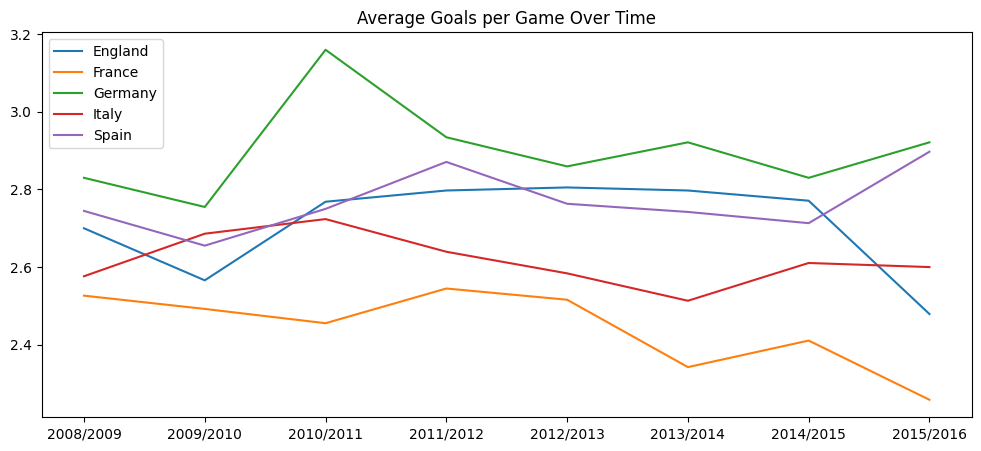

In [28]:
df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

In [ ]:
Here we can see German leagues has got highest number of average total goals over the years .

In [29]:
df2 = pd.DataFrame(index=np.sort(leagues_season['season'].unique()), columns=leagues_season['country_name'].unique())
df2

,England,France,Germany,Italy,Spain
2008/2009,NaN,NaN,NaN,NaN,NaN
2009/2010,NaN,NaN,NaN,NaN,NaN
2010/2011,NaN,NaN,NaN,NaN,NaN
2011/2012,NaN,NaN,NaN,NaN,NaN
2012/2013,NaN,NaN,NaN,NaN,NaN
2013/2014,NaN,NaN,NaN,NaN,NaN
2014/2015,NaN,NaN,NaN,NaN,NaN
2015/2016,NaN,NaN,NaN,NaN,NaN


In [ ]:
Again we have formed empty dataset .

In [32]:
df2.loc[:,'Germany'] = list(leagues_season.loc[leagues_season['country_name']=='Germany','avg_goal_differnce'])
df2.loc[:,'Spain']   = list(leagues_season.loc[leagues_season['country_name']=='Spain','avg_goal_differnce'])
df2.loc[:,'France']   = list(leagues_season.loc[leagues_season['country_name']=='France','avg_goal_differnce'])
df2.loc[:,'Italy']   = list(leagues_season.loc[leagues_season['country_name']=='Italy','avg_goal_differnce'])
df2.loc[:,'England']   = list(leagues_season.loc[leagues_season['country_name']=='England','avg_goal_differnce'])
df2

,England,France,Germany,Italy,Spain
2008/2009,0.284211,0.347368,0.300654,0.365789,0.492105
2009/2010,0.381579,0.328947,0.421569,0.311346,0.418421
2010/2011,0.378947,0.376316,0.336601,0.350000,0.513158
2011/2012,0.318421,0.392105,0.248366,0.350000,0.502632
2012/2013,0.373684,0.431579,0.460784,0.438547,0.594737
2013/2014,0.450000,0.342105,0.372549,0.350000,0.531579
2014/2015,0.623684,0.368421,0.196078,0.473684,0.486842
2015/2016,0.321053,0.315789,0.477124,0.442105,0.423684


Here we have used the loc() function to lock the average goal difference between home and away team of leagues from different countries over the years from 2008 to 2016.

<AxesSubplot:title={'center':'Average Goals Difference Home VS Away'}>

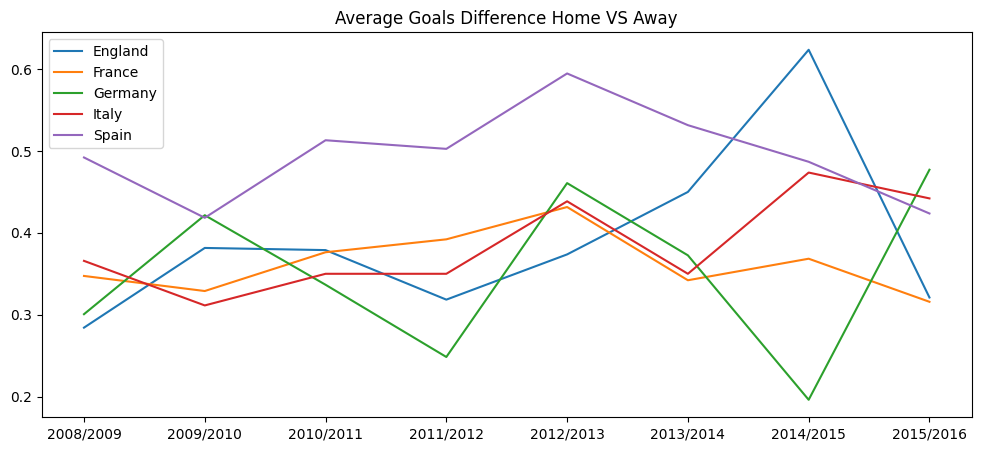

In [33]:
df2.plot(figsize=(12,5),title='Average Goals Difference Home VS Away')

# 8. Analysis on Player Attributes .

In [35]:
players_height = pd.read_sql("""SELECT CASE
                                       WHEN ROUND(height)<165 then 165
                                       WHEN ROUND(height)>195 then 195
                                       ELSE ROUND(height)
                                       END AS calc_height, 
                                       COUNT(height) AS distribution, 
                                       AVG(PA_Grouped.avg_overall_rating) AS avg_overall_rating,
                                       AVG(PA_Grouped.avg_potential) AS avg_potential,
                                       AVG(weight) AS avg_weight 
                                       FROM PLAYER
                                       LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                                         AVG(Player_Attributes.overall_rating) AS avg_overall_rating,
                                                         AVG(Player_Attributes.potential) AS avg_potential  
                                                         FROM Player_Attributes
                                                         GROUP BY Player_Attributes.player_api_id) 
                                       AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                                       GROUP BY calc_height
                                       ORDER BY calc_height """, conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


<AxesSubplot:title={'center':'Potential vs Height'}, xlabel='calc_height'>

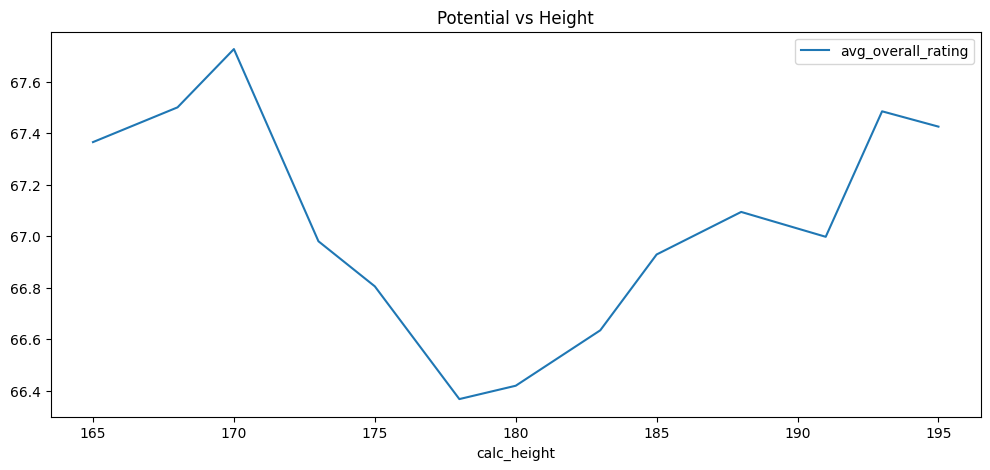

In [41]:
players_height.plot( x='calc_height' , y='avg_overall_rating' , figsize=(12,5) , title='Potential vs Height' )

Here we have performed Case() function in the SQL querry to categories the heights and make a new column as calc_heights and some other aggregate function to get some important analysis of the players physical features like average weights , potential and overall ratings.

By plot we can conclude that around 170cm height avgerage rating is highest and ariund 177-178 cm it is lowest . 

# 9. Conclusion 
In this analysis project we used different SQL querries to understand the Soccer data of European teams and got some important understanding about the most watched and played sport of the world.